https://discourse.julialang.org/t/empty-container-reduce-error-diff-eq/64956

In [1]:
using DifferentialEquations
using LinearAlgebra
using Plots

In [2]:
function g_naive!(dv, v, d, p, t)
    m, f, c, K = p
    # The following is equivalent to dv .= M \ (f - (C * v + K * d)),
    # where K = Matrix, C = Diagonal(c), M = Diagonal(m)
    dv .= m .\ (f .- (c .* v .+ K * d))
    return
end

g_naive! (generic function with 1 method)

In [3]:
m = Float64[1, 2, 3, 4]
f = Float64[-10, -10, -10, -10]
c = Float64[1, 1, 1, 1]
K = [
     2 -1  0  0
    -1  2 -1  0
     0  1  2 -1
     0  0 -1  2
]
p = (m, f, c, K)
v0 = Float64[0, 0, 0, 0]
d0 = Float64[3, 1, -1, -3]
tspan = (0.0, 10.0)

(0.0, 10.0)

  7.740355 seconds (32.65 M allocations: 1.728 GiB, 7.07% gc time, 100.00% compilation time)
  0.000091 seconds (608 allocations: 70.188 KiB)
  0.000146 seconds (608 allocations: 70.188 KiB)


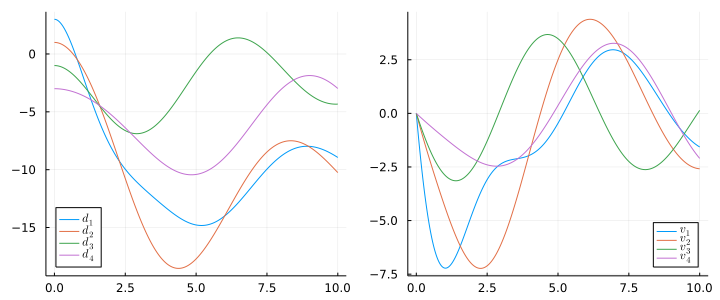

In [4]:
prob = SecondOrderODEProblem(g_naive!, v0, d0, tspan, p)
@time sol = solve(prob)
@time sol = solve(prob)
@time sol = solve(prob)

t = range(sol.prob.tspan...; length=400)
v = vcat((t -> sol(t)[1:4]').(t)...)
d = vcat((t -> sol(t)[5:8]').(t)...)
P = plot(t, d; label=permutedims(["\$d_$i\$" for i in 1:4]), legend=:bottomleft)
Q = plot(t, v; label=permutedims(["\$v_$i\$" for i in 1:4]), legend=:bottomright)
plot(P, Q; size=(720, 300))

In [5]:
function g!(dv, v, d, p, t)
    m, f, c, K = p
    # The following is equivalent to dv .= M \ (f - (C * v + K * d)),
    # where K = Matrix, C = Diagonal(c), M = Diagonal(m)
    mul!(dv, K, d)
    @. dv += c * v
    @. dv = f - dv
    @. dv = m \ dv
    return
end

g! (generic function with 1 method)

  3.460244 seconds (8.04 M allocations: 441.825 MiB, 2.17% gc time, 100.00% compilation time)
  0.000077 seconds (473 allocations: 55.422 KiB)
  0.000090 seconds (473 allocations: 55.422 KiB)


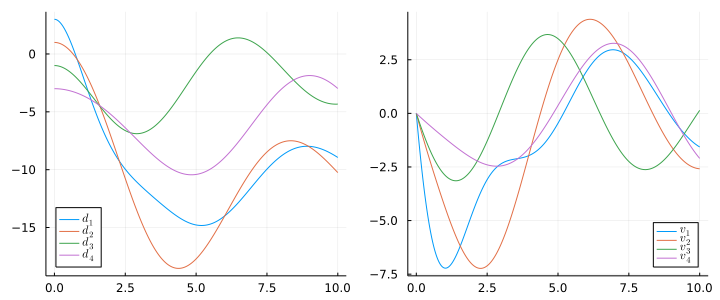

In [6]:
prob = SecondOrderODEProblem(g!, v0, d0, tspan, p)
@time sol = solve(prob)
@time sol = solve(prob)
@time sol = solve(prob)

t = range(sol.prob.tspan...; length=400)
v = vcat((t -> sol(t)[1:4]').(t)...)
d = vcat((t -> sol(t)[5:8]').(t)...)
P = plot(t, d; label=permutedims(["\$d_$i\$" for i in 1:4]), legend=:bottomleft)
Q = plot(t, v; label=permutedims(["\$v_$i\$" for i in 1:4]), legend=:bottomright)
plot(P, Q; size=(720, 300))